In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import mahotas as mt

In [2]:
pip install mahotas

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
ds_path = r"C:\Users\Acer\Desktop\Leaf-Disease-Detection-Using-Image-Processing-main\Leaf-Disease-Detection-Using-Image-Processing-main"

In [5]:
test_img_path = ds_path +"\\test.jpg"
test_img_path

'C:\\Users\\Acer\\Desktop\\Leaf-Disease-Detection-Using-Image-Processing-main\\Leaf-Disease-Detection-Using-Image-Processing-main\\test.jpg'

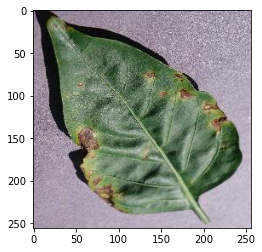

In [6]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

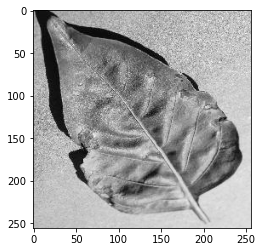

In [7]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [8]:
gs.shape

(256, 256)

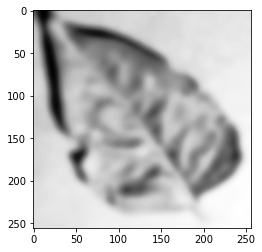

In [9]:
blur = cv2.GaussianBlur(gs, (25,25), 0)
plt.imshow(blur, cmap = 'Greys_r')

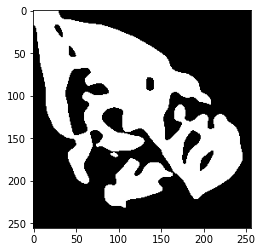

In [10]:
ret_otsu, im_bw_otsu = cv2.threshold(blur, 0 ,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

In [11]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

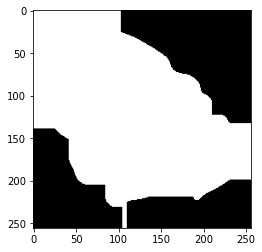

In [12]:
plt.imshow(closing,cmap='Greys_r')

In [13]:
#1. Color based features

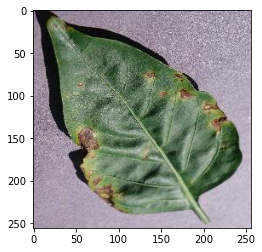

In [14]:
plt.imshow(img,cmap="Greys_r")

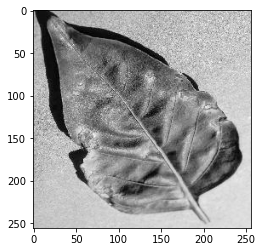

In [15]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

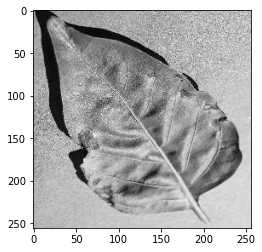

In [16]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

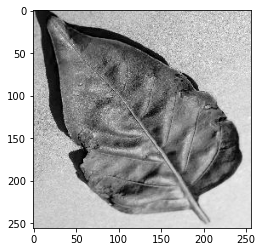

In [17]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [18]:
np.mean(blue_channel)

125.55296325683594

In [19]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [20]:
red_mean = np.mean(red_channel)
red_mean

128.8546905517578

In [21]:
green_mean = np.mean(green_channel)
green_mean

133.11647033691406

In [22]:
blue_mean = np.mean(blue_channel)
blue_mean

125.49459838867188

In [23]:
red_var = np.std(red_channel)
red_var

51.77734230864006

In [24]:
#3. Texture based features
#Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [25]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 1.39131298e-04,  6.68621700e+02,  8.46056280e-01,  2.17158746e+03,
        9.87327816e-02,  2.61673949e+02,  8.01772814e+03,  8.30123894e+00,
        1.35125158e+01,  1.06572328e-04,  5.56579282e+00, -1.73236909e-01,
        9.60352430e-01])

In [33]:
#pip install numpy --upgrade
#install -c https://conda.binstar.org/luispedro mahotas


In [34]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

668.6216996167335
0.8460562803940554
0.09873278158258438
13.512515806180476


In [35]:
pip install mahotas

Note: you may need to restart the kernel to use updated packages.
